In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
emprestimo_acervo = pd.read_parquet('emprestimo_acervo/emprestimo_acervo.parquet')
emprestimo_acervo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,None,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.
1,709685,L167050,None,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas.
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas.
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas.


In [27]:
# Converter a coluna para datetime
emprestimo_acervo['data_emprestimo'] = pd.to_datetime(emprestimo_acervo['data_emprestimo'])
emprestimo_acervo['data_emprestimo'].dtypes

dtype('<M8[ns]')

In [28]:
# Contar exemplares agrupando diretamente por ano extraído de 'data_emprestimo'
total_por_ano = (
    emprestimo_acervo['data_emprestimo'].dt.year # Extrai o ano
    .value_counts() # Conta a frequência de cada ano
    .rename_axis('ano') # Nomeia o índice como 'ano'
    .reset_index(name = 'quantidade') # Transforma em DataFrame e renomeia a coluna
    .sort_values('ano') # Ordena pelos anos
)

total_por_ano

,ano,quantidade
9,2010,161394
6,2011,196390
1,2012,221365
0,2013,234749
2,2014,219189
5,2015,213582
4,2016,215900
3,2017,218462
7,2018,194080
8,2019,171801


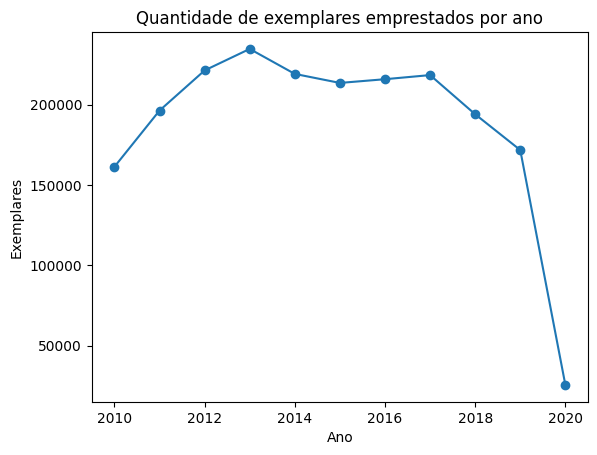

In [29]:
plt.plot(total_por_ano['ano'], total_por_ano['quantidade'], marker = 'o')
plt.xlabel('Ano')
plt.ylabel('Exemplares')
plt.title('Quantidade de exemplares emprestados por ano')
plt.show()

# O gráfico nos mostra que nos primeiros 4 anos, altas consecutivas de exemplares emprestados,
# sendo 2013 o ano com mais exemplares emprestados.
# Após isso, os 4 anos seguintes foram de uma leve queda, mas de estabilização dos empréstimos.
# Contudo a partir de 2018 houve uma significativa queda nas quantidades, continuando pelo ano seguinte.
# 2020 não se tem uma base, pois são apenas valores do primeiro semestre, mas provavelmente a queda contínua deve permanecer.

# O que pode ter impactado essa queda? Pouco apelo dos leitores? Novas opções para leitura, como Kindle? Queda do interesse do público geral?
# O acervo das bibliotecas está se mantendo atualizado? Como estão as estratégias de marketing? Qual o nível de satisfação dos consumidores?

In [30]:
total_por_mes = (
    emprestimo_acervo['data_emprestimo'].dt.month
    .value_counts()
    .rename_axis('mes')
    .reset_index(name = 'quantidade')
    .sort_values('mes')
)

total_por_mes

,mes,quantidade
11,1,67514
2,2,210200
0,3,252185
3,4,208725
5,5,202530
8,6,138123
9,7,123790
1,8,232793
4,9,208234
6,10,188410


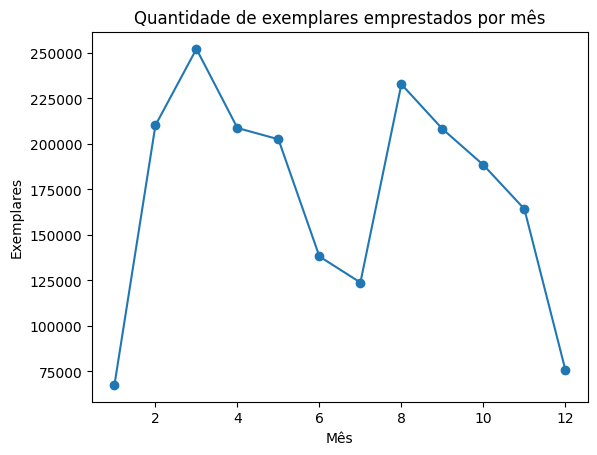

In [31]:
plt.plot(total_por_mes['mes'], total_por_mes['quantidade'], marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Exemplares')
plt.title('Quantidade de exemplares emprestados por mês')
plt.show()

# Os melhores meses para as férias dos funcionários são janeiro e dezembro, com um valor consideravelmente menor em comparação com outros.
# Com a devida queda do quadro de funcionários, dois meses podem ser bons para outras atividades além do atendimento ao público
# são junho e julho, com novembro podendo ser uma alternativa a mais.
# A suspeita de meses com maior volume de empréstimos foi quase acertada, visto que sim, março é o com maior número, mas o outro mês é agosto
# e não setembro como a suspeita dizia.
# Uma boa oportunidade para empréstimo pode ser em junho e julho, com promoções, ativações para as férias de meio de ano.

In [32]:
total_por_hora = (
    emprestimo_acervo['data_emprestimo'].dt.hour
    .value_counts()
    .rename_axis('hora')
    .reset_index(name = 'quantidade')
    .sort_values('hora')
)

total_por_hora

,hora,quantidade
17,0,17
18,6,14
14,7,18777
11,8,103416
8,9,131273
1,10,185839
4,11,180048
7,12,148754
10,13,126987
6,14,150876


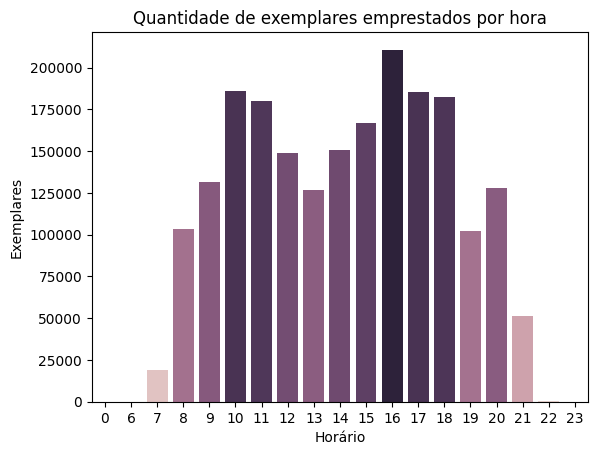

In [33]:
sns.barplot(data = total_por_hora, x = 'hora', y = 'quantidade', hue='quantidade', legend=False)
plt.title('Quantidade de exemplares emprestados por hora')
plt.xlabel('Horário')
plt.ylabel('Exemplares')
plt.show()

# Os horários com maior atendimento são de 10h até 18h
# Os melhores horários para alocar demais atividades são das 7h-9h e das 19h-21h, especialmente às 7h e 21h, tendo um volume bem baixo.